In [1]:
# Add the path to import module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import feature_eng.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
module_path

'/home/hzn/kaggle/github/kaggle-zillow'

In [2]:
train, prop = utils.load_train_data('../data/')

/home/hzn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
column_types = list(map(lambda x: prop[x].dtype, prop.columns))

In [4]:
column_types_set = set(column_types)
column_types_set

{dtype('int64'), dtype('float64'), dtype('O')}

In [5]:
column_types_count = list(map(lambda x: (x,column_types.count(x)), column_types_set))
column_types_count

[(dtype('O'), 5), (dtype('float64'), 52), (dtype('int64'), 1)]

In [6]:
object_columns = list(filter(lambda x: prop[x].dtype == 'object', prop.columns))
object_columns

['hashottuborspa',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'fireplaceflag',
 'taxdelinquencyflag']

In [7]:
int_columns = list(filter(lambda x: prop[x].dtype == 'int64', prop.columns))
int_columns

['parcelid']

In [8]:
float_columns = list(filter(lambda x: prop[x].dtype == 'float64', prop.columns))

In [9]:
# object columns
for col in object_columns:
    print(prop[col].describe())
    print("#")
    print(prop[col].value_counts().head())
    print(">>>>>>>>>>>>>>>>>>>>\n") 

count     69014
unique        1
top        True
freq      69014
Name: hashottuborspa, dtype: object
#
True    69014
Name: hashottuborspa, dtype: int64
>>>>>>>>>>>>>>>>>>>>

count     2972940
unique        240
top          0100
freq      1153896
Name: propertycountylandusecode, dtype: object
#
0100    1153896
122      522145
0101     247494
010C     225410
1111     126491
Name: propertycountylandusecode, dtype: int64
>>>>>>>>>>>>>>>>>>>>

count     1978629
unique       5638
top          LAR1
freq       275029
Name: propertyzoningdesc, dtype: object
#
LAR1     275029
LAR3      67105
LARS      54859
LBR1N     52750
LAR2      48808
Name: propertyzoningdesc, dtype: int64
>>>>>>>>>>>>>>>>>>>>

count     5163
unique       1
top       True
freq      5163
Name: fireplaceflag, dtype: object
#
True    5163
Name: fireplaceflag, dtype: int64
>>>>>>>>>>>>>>>>>>>>

count     56462
unique        1
top           Y
freq      56462
Name: taxdelinquencyflag, dtype: object
#
Y    56462
Name: taxdelinquency

In [10]:
# float type columns, many of the columns are actually categorical / boolean
# Supress scientific notation
pd.set_option('display.float_format', lambda x: '%.1f' % x)
for col in float_columns:
    print(prop[col].describe())
    print("#")
    print(prop[col].value_counts().head())
    print(">>>>>>>>>>>>>>>>>>>>\n") 

count   811519.0
mean         1.9
std          3.1
min          1.0
25%          1.0
50%          1.0
75%          1.0
max         13.0
Name: airconditioningtypeid, dtype: float64
#
1.0     742364
13.0     58457
5.0       8795
11.0      1818
12.0        59
Name: airconditioningtypeid, dtype: int64
>>>>>>>>>>>>>>>>>>>>

count   6061.0
mean       7.2
std        2.4
min        2.0
25%        7.0
50%        7.0
75%        7.0
max       27.0
Name: architecturalstyletypeid, dtype: float64
#
7.0     5251
8.0      380
2.0      201
21.0     150
3.0       58
Name: architecturalstyletypeid, dtype: int64
>>>>>>>>>>>>>>>>>>>>

count   1628.0
mean     646.9
std      538.8
min       20.0
25%      272.0
50%      534.0
75%      847.2
max     8516.0
Name: basementsqft, dtype: float64
#
1528.0    25
700.0     21
240.0     21
100.0     18
144.0     16
Name: basementsqft, dtype: int64
>>>>>>>>>>>>>>>>>>>>

count   2973755.0
mean          2.2
std           1.1
min           0.0
25%           2.0
50%        

In [11]:
# correlation between features
# correlation between feature and logerror, abslogerror, positive logerror, negative logerror

# column1 = 'taxamount'
# column2 = 'taxvaluedollarcnt'
# prop.corr()[column1][column2]

# Too many features, kan bu qing
# import seaborn as sns
# sns.heatmap(prop.corr())

corr = prop.corr()

In [12]:
# # Stack approach
# stacked_corr = corr.stack()
# stacked_corr = stacked_corr.reset_index()
# stacked_corr = stacked_corr[stacked_corr['level_0'] != stacked_corr['level_1']]
# # High correlation columns
# threshold = 0.7
# high_corr = stacked_corr[
#     (stacked_corr[0] > threshold) | (stacked_corr[0] < -threshold)]
# high_corr

In [13]:
# https://stackoverflow.com/questions/38552055/how-to-scan-a-panda-dataframe-for-all-values-greater-than-something-and-returns

threshold = 0.7

# Extract values and row, column names
arr = corr.values
index_names = corr.index
col_names = corr.columns

#  Get indices where such threshold is crossed; avoid diagonal elems
R,C = np.where((np.triu(arr,1) > threshold) | (np.triu(arr,1) < -threshold))

# Arrange those in columns and put out as a dataframe
out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['row_name','col_name','value']])

/home/hzn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater
/home/hzn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [15]:
df_out

,row_name,col_name,value
0,airconditioningtypeid,fips,0.8
1,airconditioningtypeid,rawcensustractandblock,0.8
2,airconditioningtypeid,regionidcounty,-0.8
3,airconditioningtypeid,roomcnt,0.8
4,airconditioningtypeid,censustractandblock,0.8
5,architecturalstyletypeid,unitcnt,-1.0
6,bathroomcnt,bedroomcnt,0.7
7,bathroomcnt,calculatedbathnbr,1.0
8,bathroomcnt,finishedsquarefeet12,0.7
9,bathroomcnt,fullbathcnt,1.0


In [16]:
# # Interesting correlations:

# # bathroom
# 6	bathroomcnt	bedroomcnt	0.7
# 7	bathroomcnt	calculatedbathnbr	1.0 expected
# 9	bathroomcnt	fullbathcnt	1.0 expected
# 13	calculatedbathnbr	fullbathcnt	1.0 expected
# 8	bathroomcnt	finishedsquarefeet12 	0.7 finished living area
# 23	fullbathcnt	finishedsquarefeet12	0.8
# 27  fullbathcnt	finishedsquarefeet15    0.7
# 11	calculatedbathnbr	finishedsquarefeet12	0.8
# 12	calculatedbathnbr	finishedsquarefeet15	0.7 Total area

# # building quality and garage
# 10	buildingqualitytypeid	garagecarcnt	0.8

# # areas
# 14	finishedfloor1squarefeet	calculatedfinishedsquarefeet	0.7
# 15	finishedfloor1squarefeet	finishedsquarefeet12	0.7
# 16	finishedfloor1squarefeet	finishedsquarefeet15	0.8
# 17	finishedfloor1squarefeet	finishedsquarefeet50	1.0
# 18	calculatedfinishedsquarefeet	finishedsquarefeet12	1.0
# 19	calculatedfinishedsquarefeet	finishedsquarefeet13	1.0
# 20	calculatedfinishedsquarefeet	finishedsquarefeet15	1.0
# 21	calculatedfinishedsquarefeet	finishedsquarefeet6	1.0
# 22	finishedsquarefeet12	finishedsquarefeet15	1.0
# 25	finishedsquarefeet13	yardbuildingsqft26	1.0
# 26	finishedsquarefeet15	finishedsquarefeet50	0.8
# 28	finishedsquarefeet15	garagecarcnt	0.7
# 29	finishedsquarefeet15	poolsizesum	0.9
# 30	finishedsquarefeet15	unitcnt	0.8
# 31	finishedsquarefeet15	yardbuildingsqft17	0.8

# # tax
# 24	finishedsquarefeet12	structuretaxvaluedollarcnt	0.7
# 34	structuretaxvaluedollarcnt	taxvaluedollarcnt	0.8
# 35	structuretaxvaluedollarcnt	taxamount	0.8
# 36	taxvaluedollarcnt	landtaxvaluedollarcnt	0.9
# 37	taxvaluedollarcnt	taxamount	0.9
# 38	landtaxvaluedollarcnt	taxamount	0.8

In [ ]:
# plot between a feature and the logerror

In [1]:
import feature_eng.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train, prop = utils.load_train_data()
df = train.merge(prop, how='left', on='parcelid')

/home/hzn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
df['abserror'] = abs(df['logerror']) 

In [9]:
df['logerror'].quantile(0.01)

-0.3425

In [3]:
def plot_feature_logerror(column):
    plot_log_error = df.groupby(column)['logerror'].mean()
    plt.figure(figsize=(8, 6))
    plt.title(column)
    plt.grid()
    plt.plot(plot_log_error.index, plot_log_error)

def plot_feature_abserror(column):
    plot_log_error = df.groupby(column)['abserror'].mean()
    plt.figure(figsize=(8, 6))
    plt.title(column)
    plt.grid()
    plt.scatter(plot_log_error.index, plot_log_error)

/home/hzn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


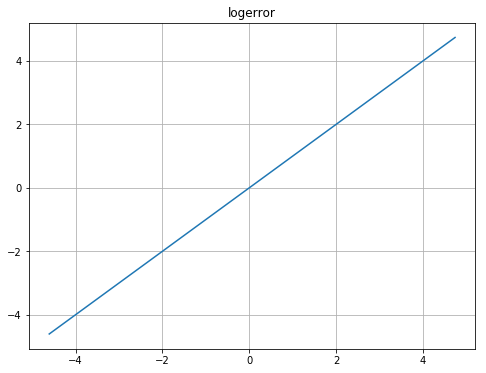

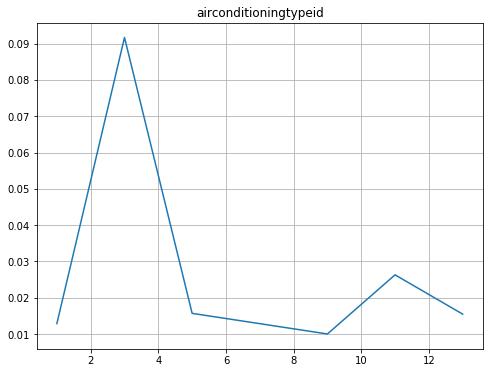

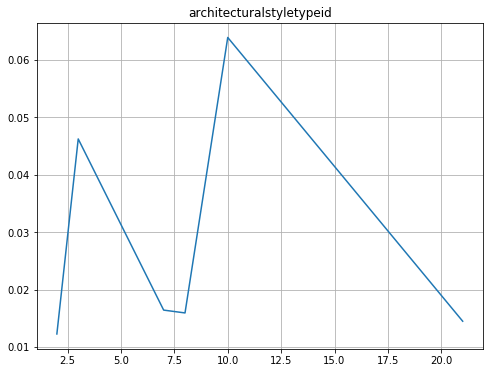

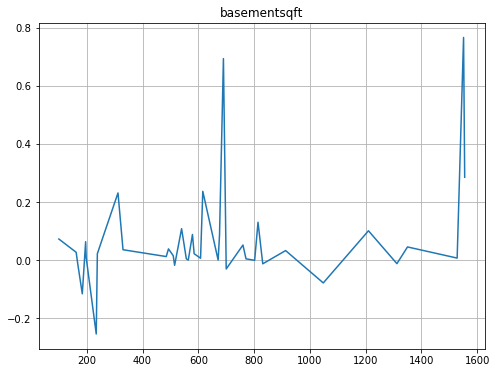

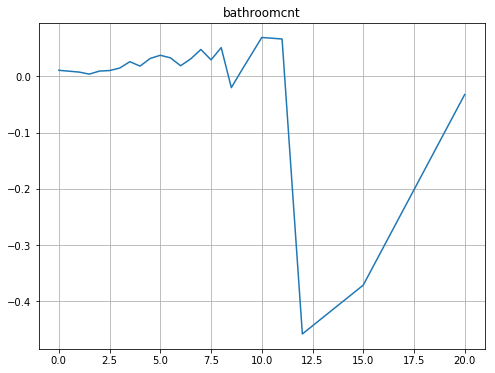

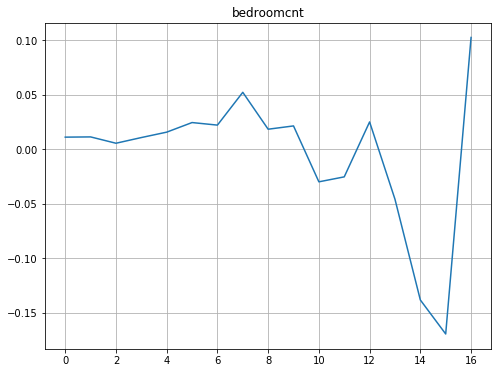

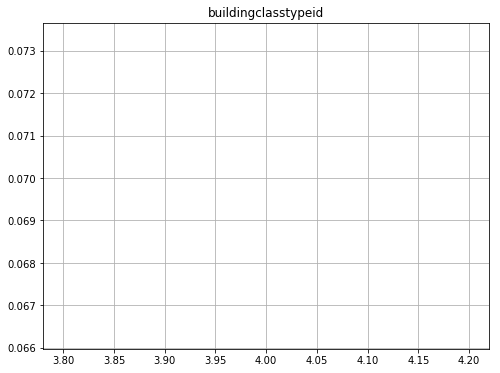

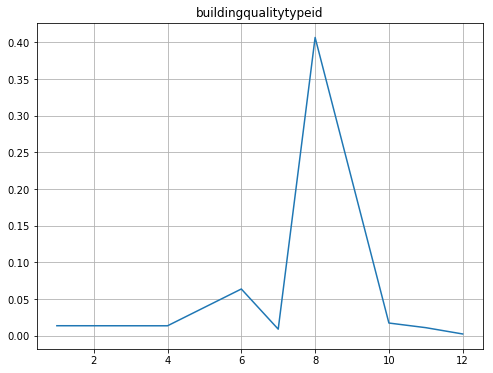

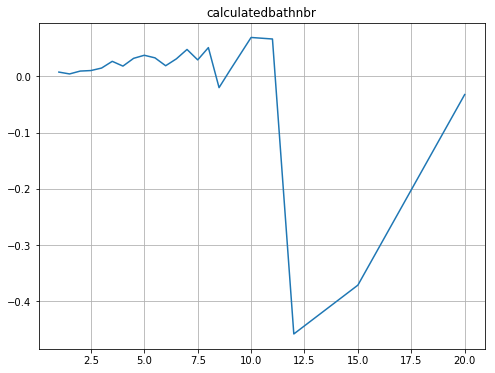

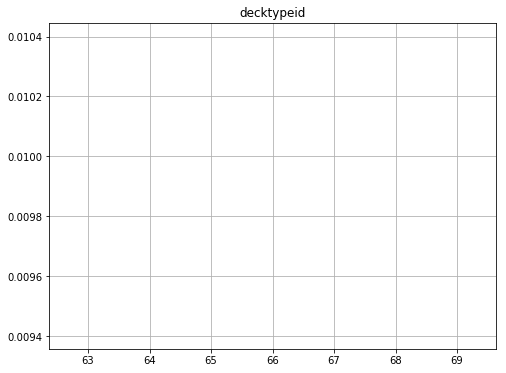

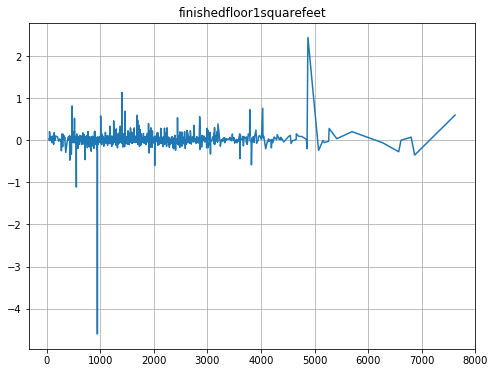

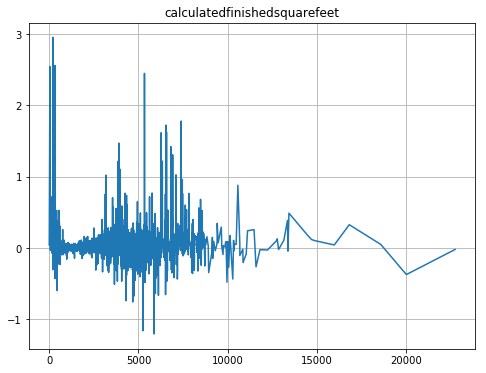

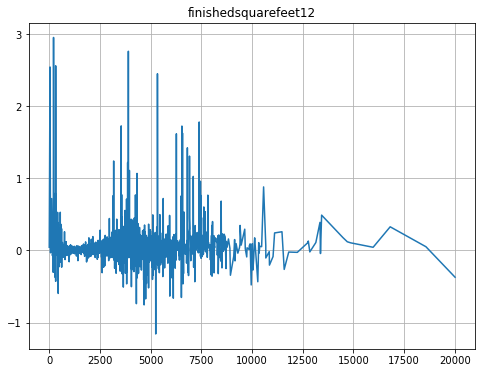

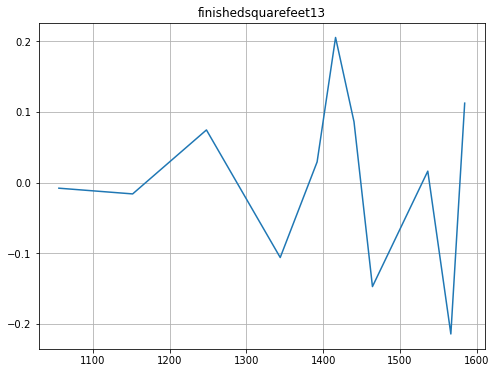

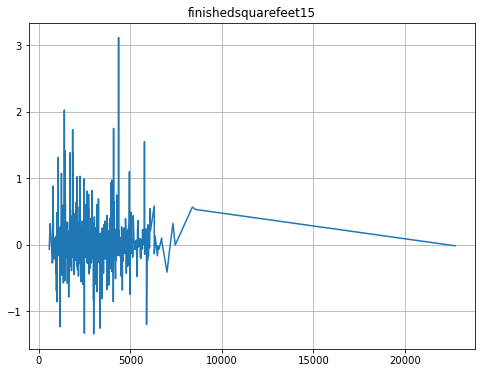

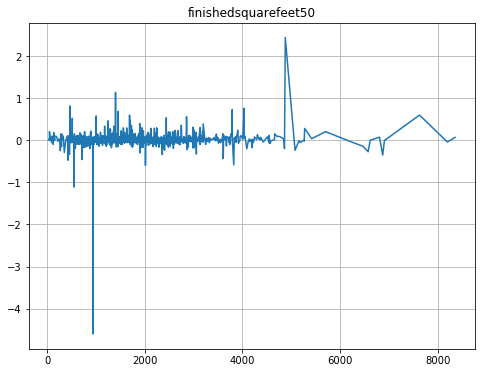

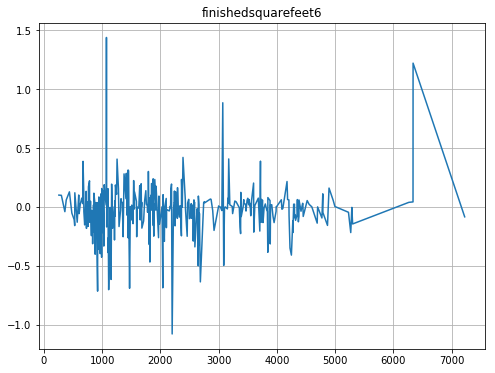

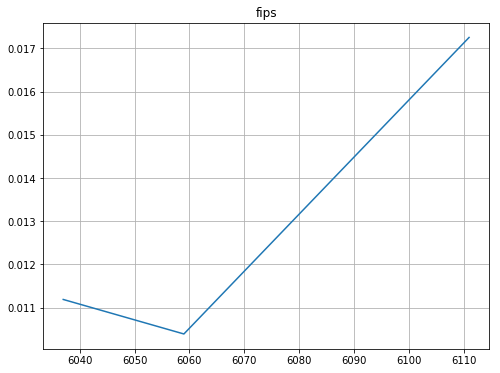

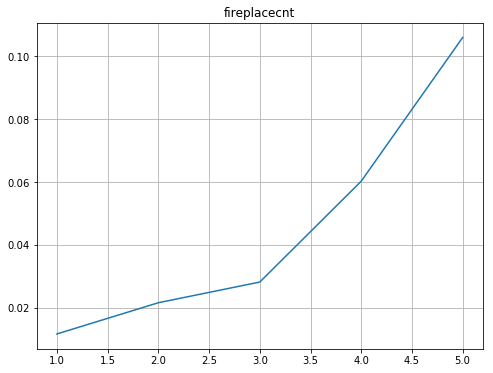

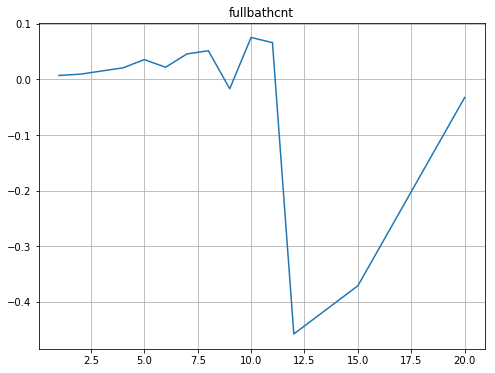

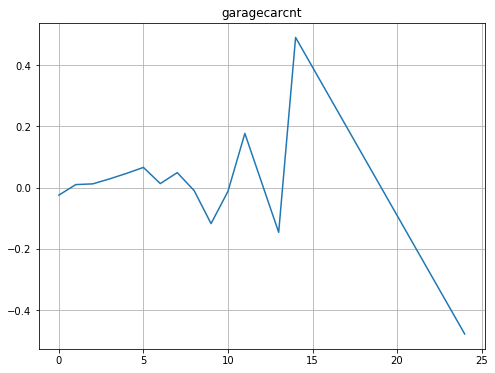

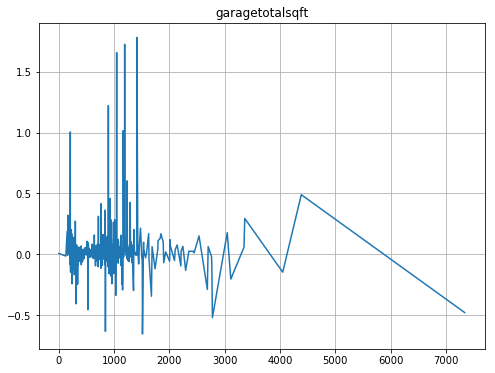

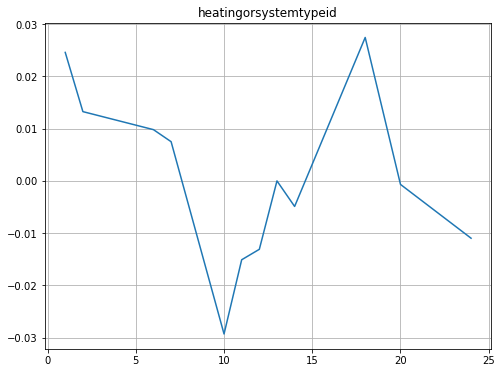

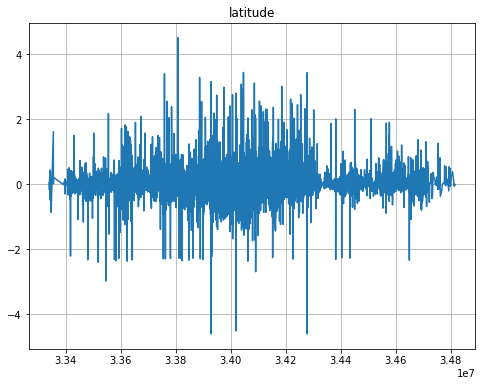

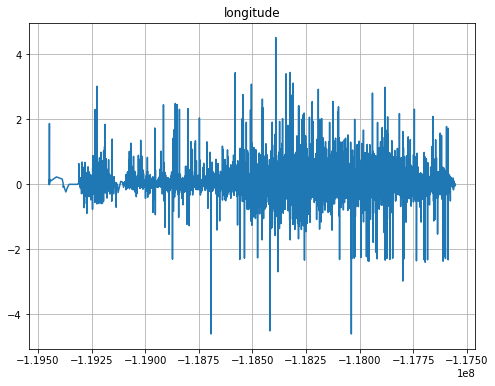

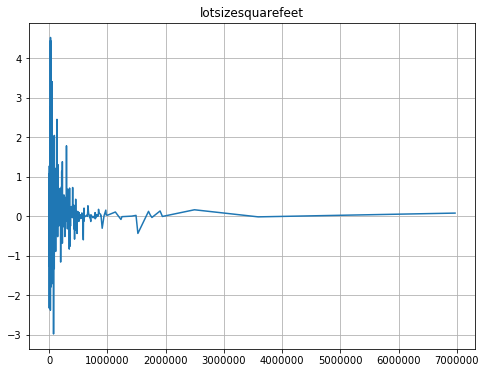

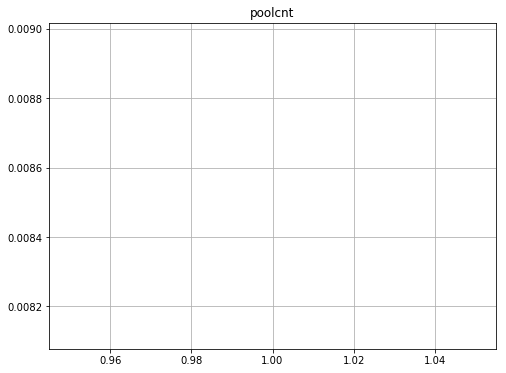

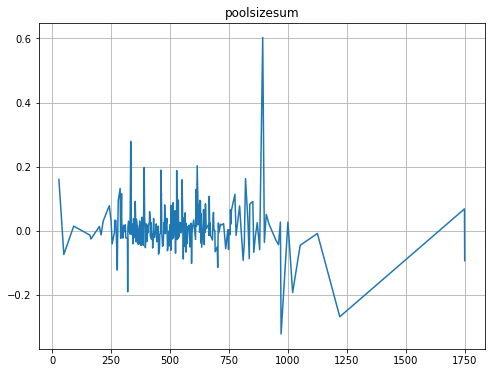

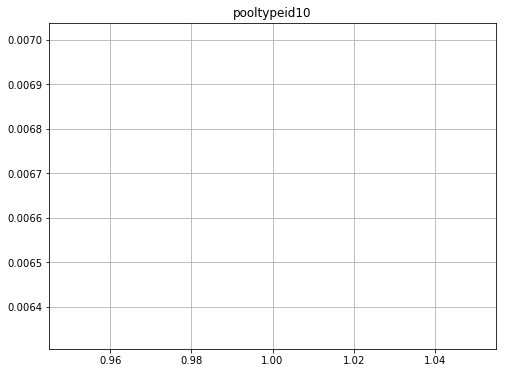

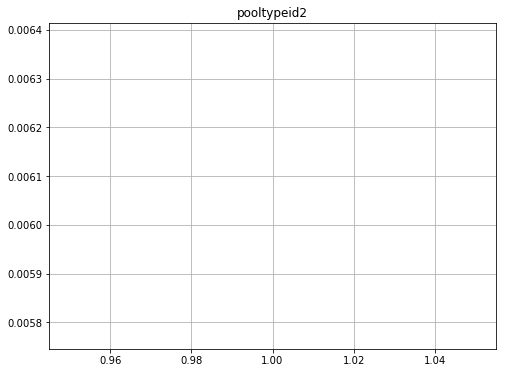

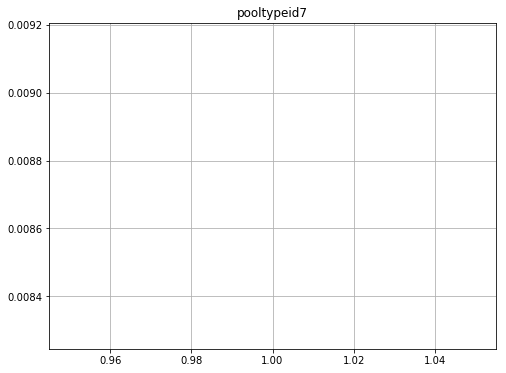

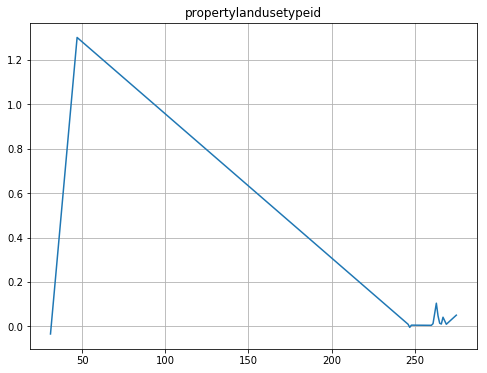

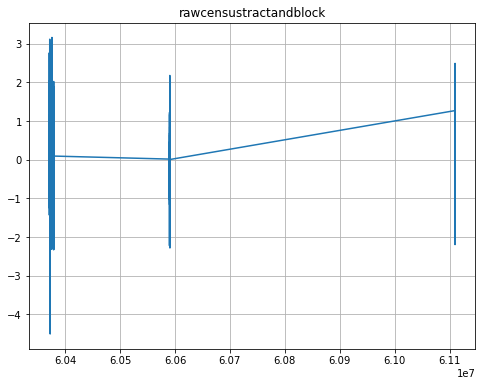

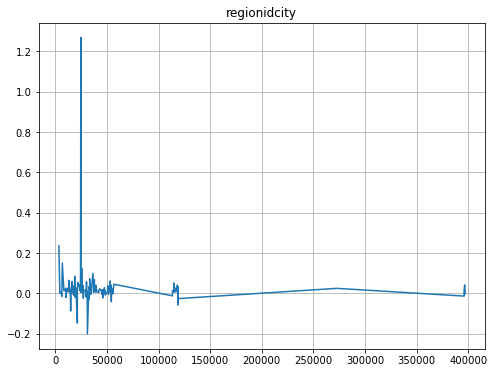

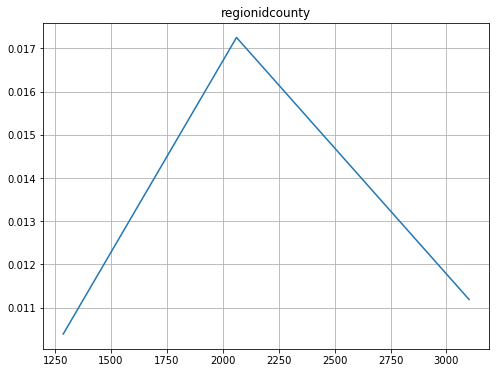

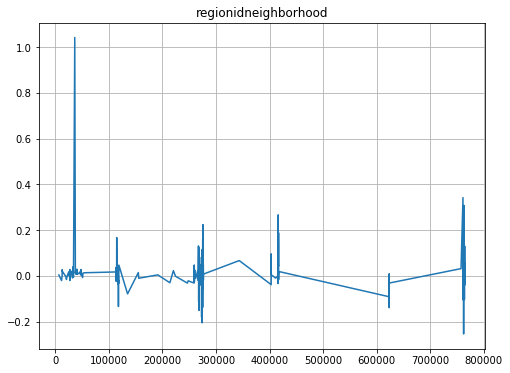

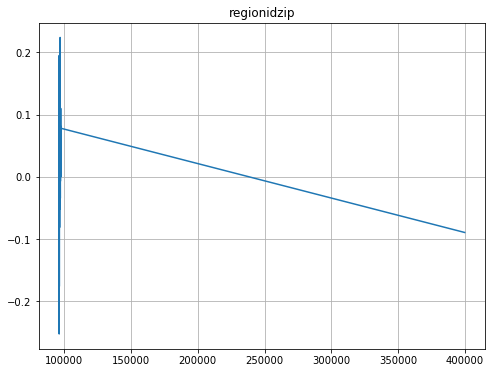

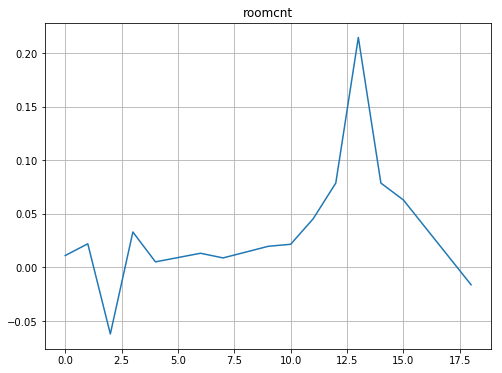

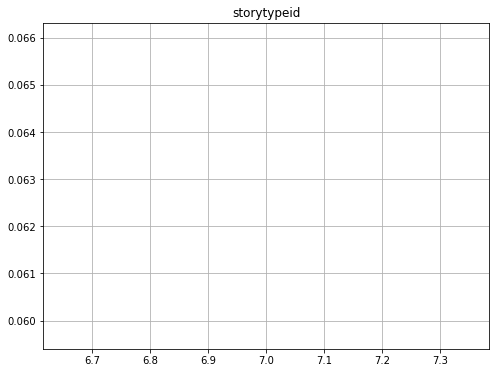

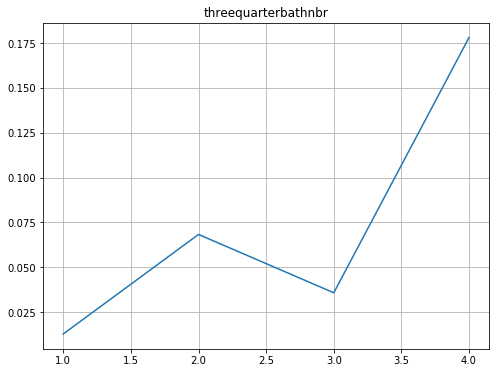

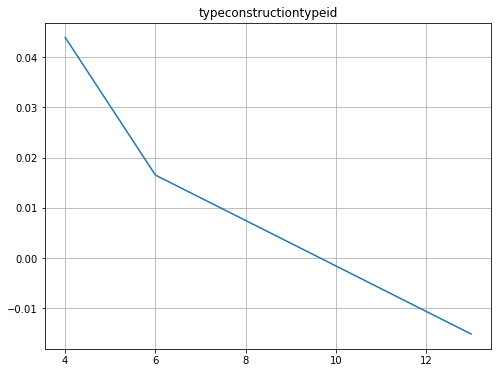

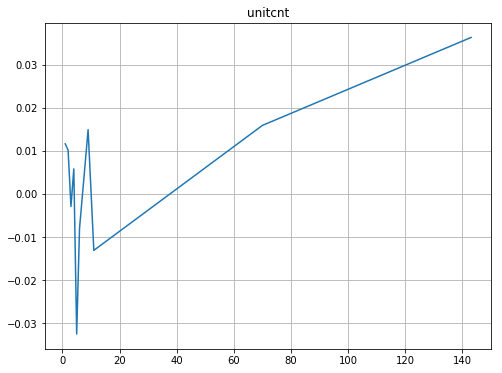

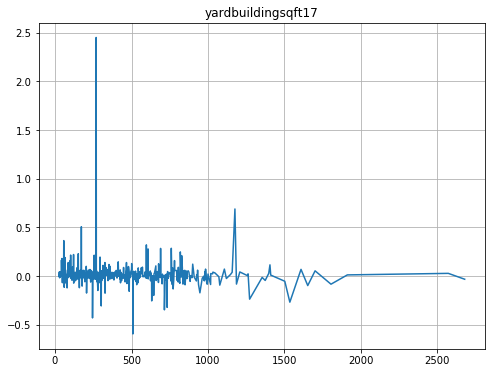

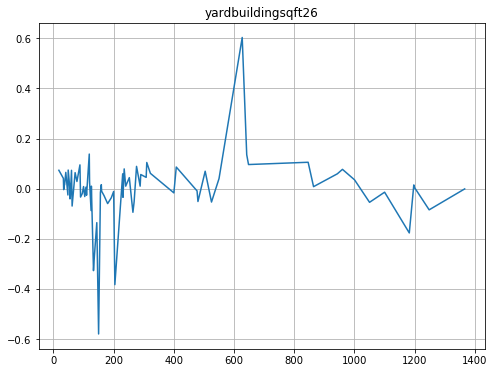

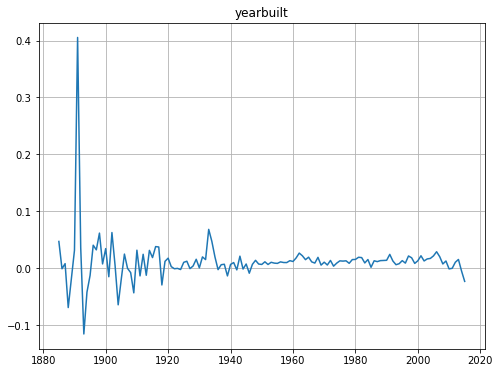

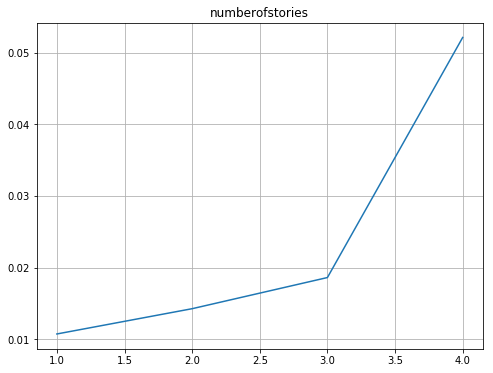

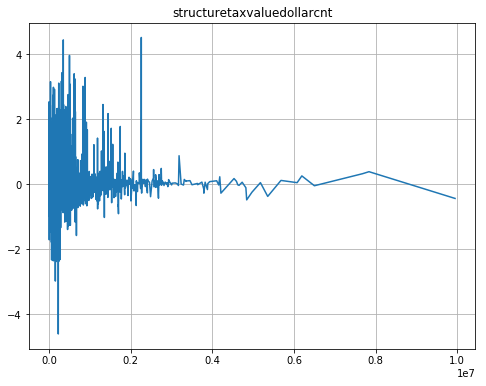

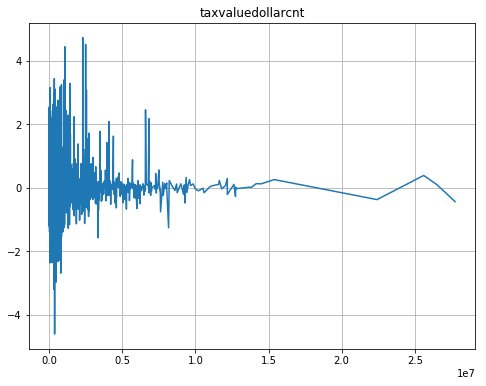

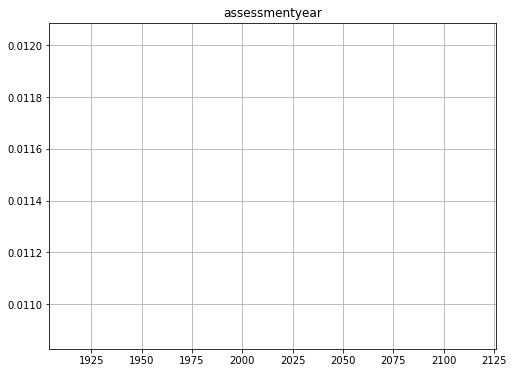

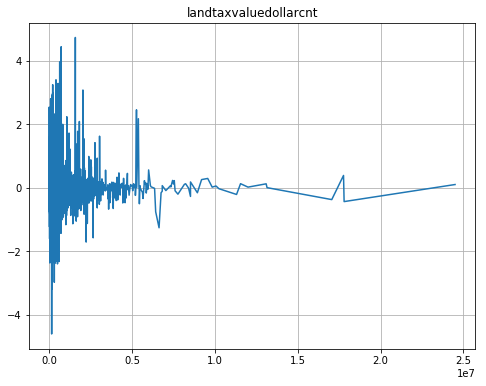

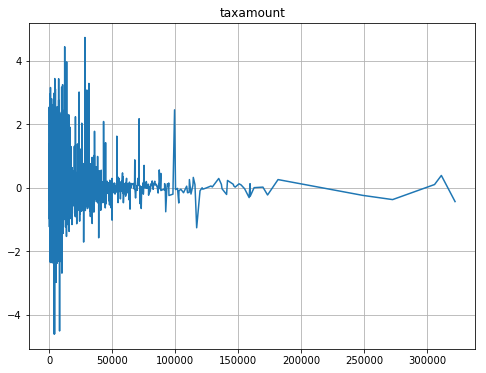

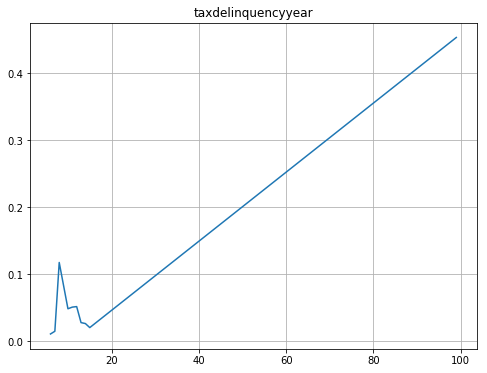

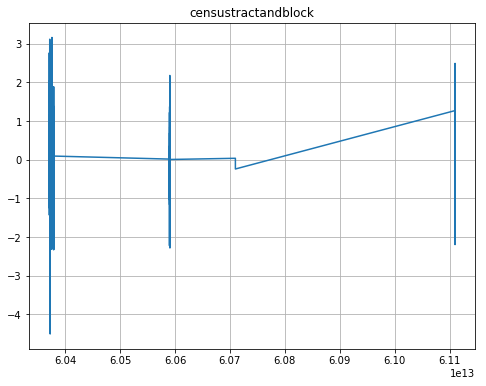

In [19]:
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_feature_logerror(col)

/home/hzn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


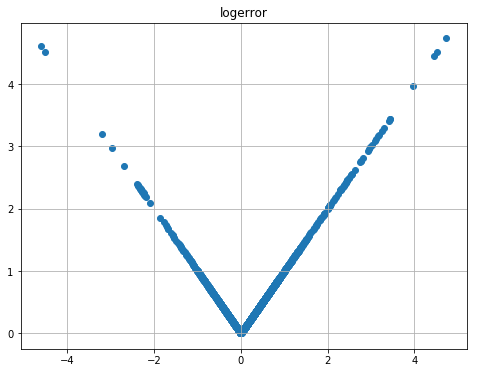

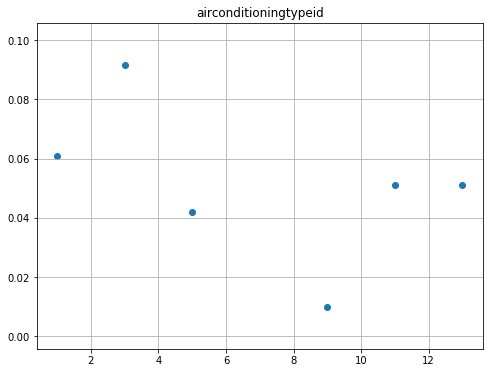

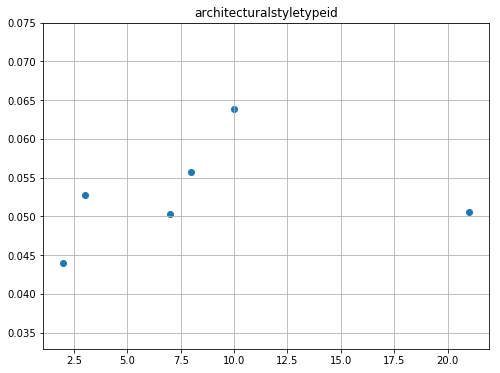

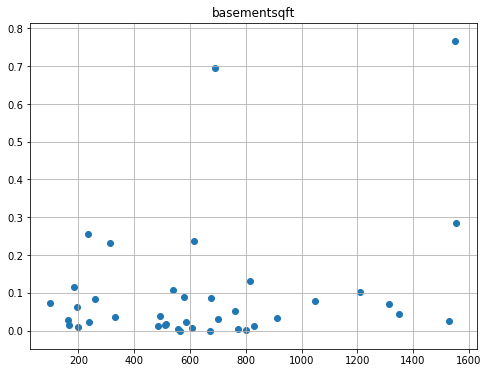

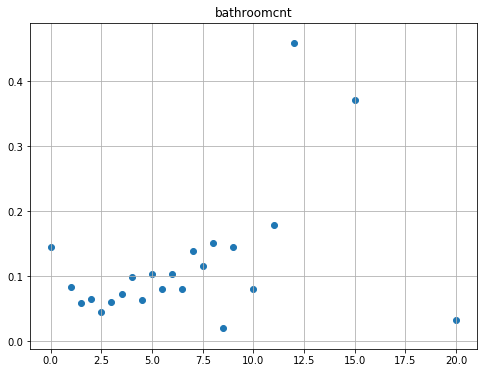

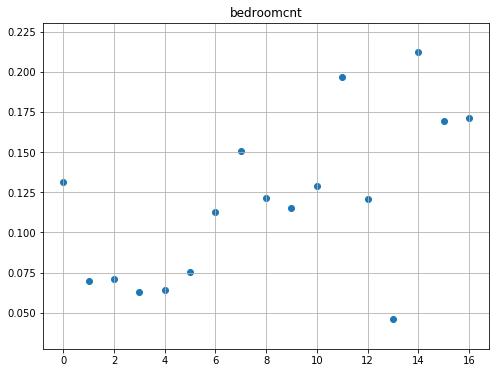

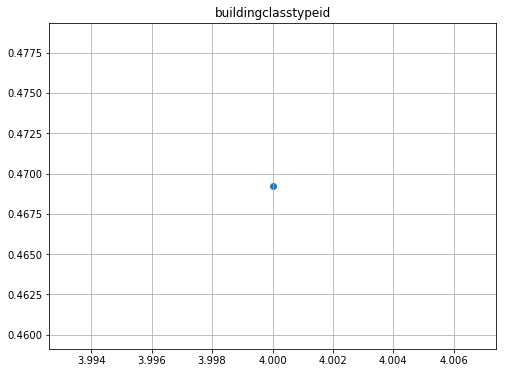

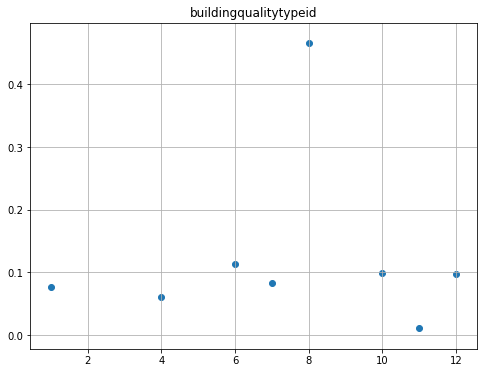

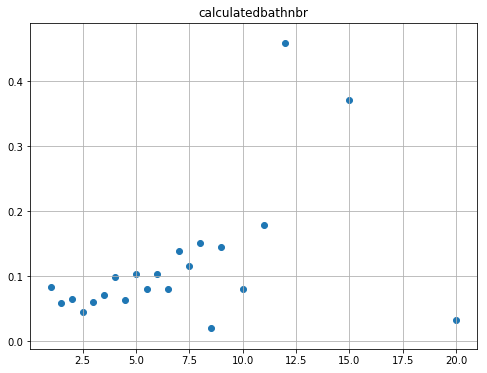

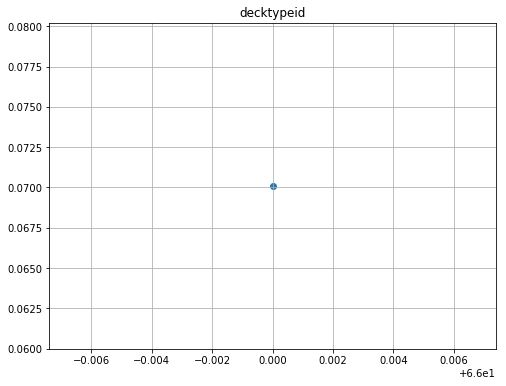

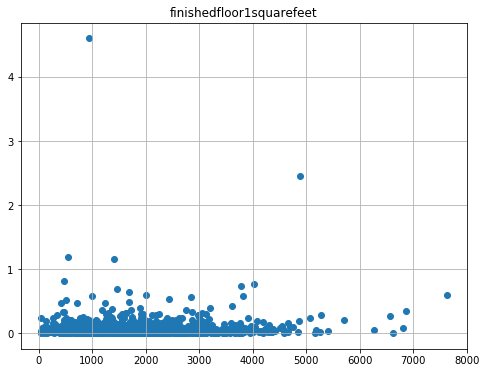

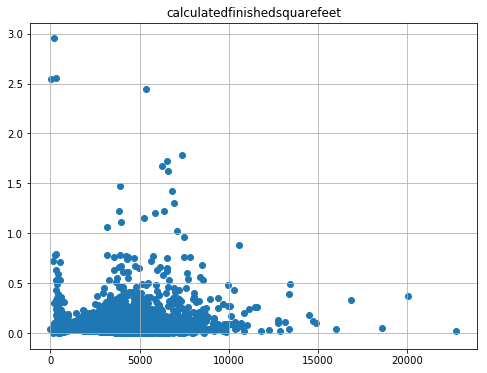

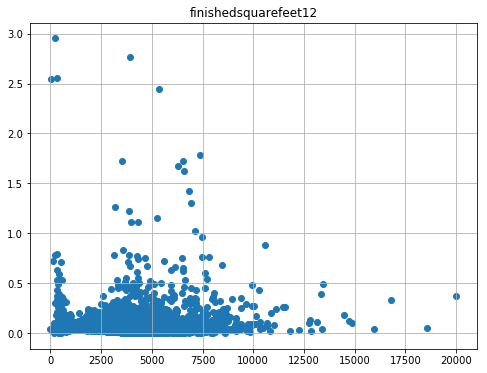

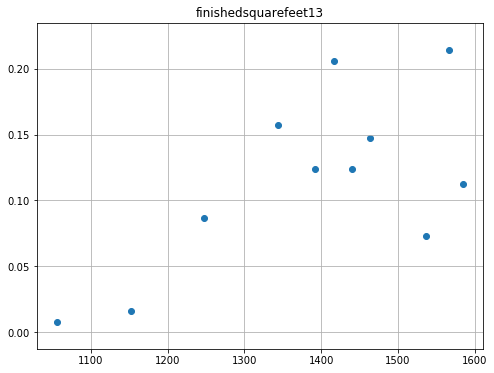

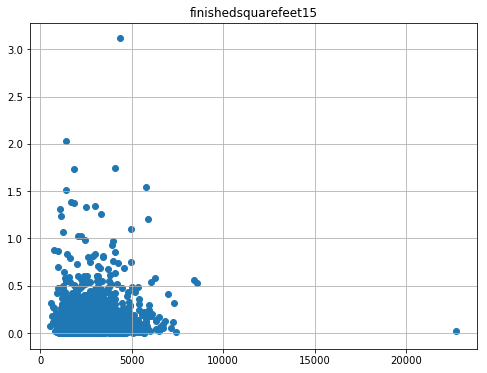

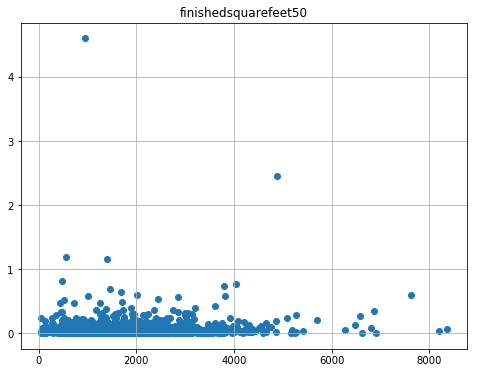

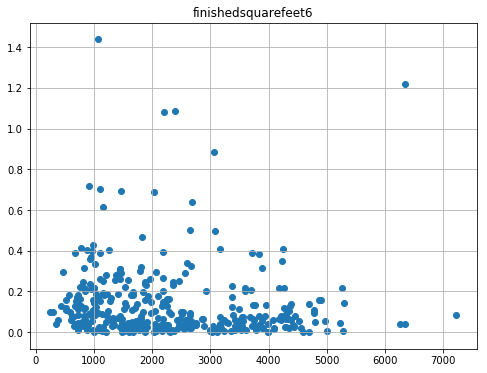

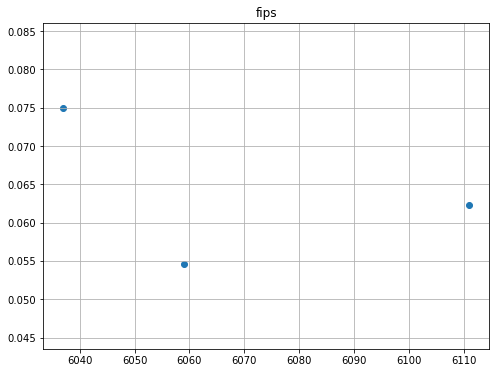

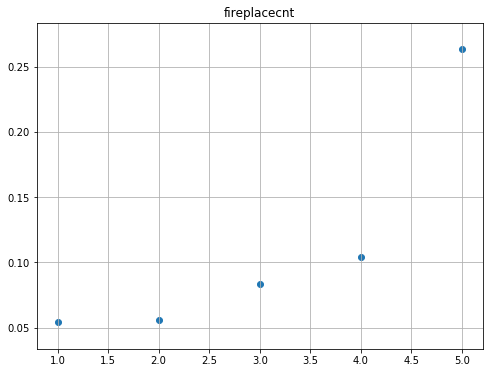

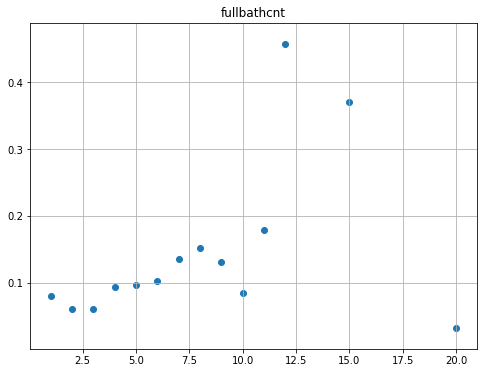

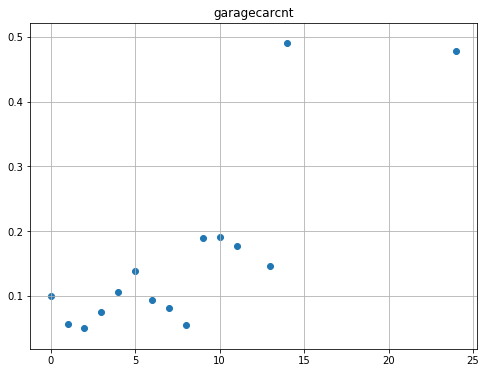

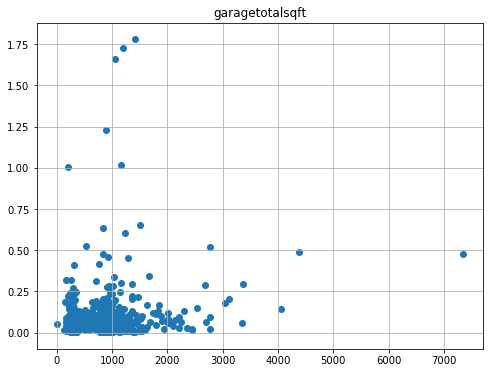

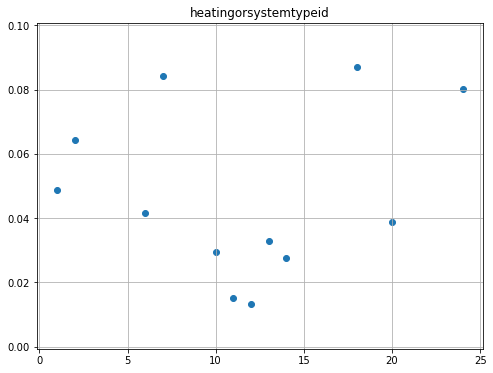

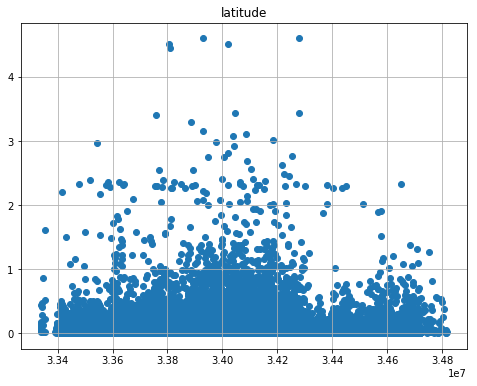

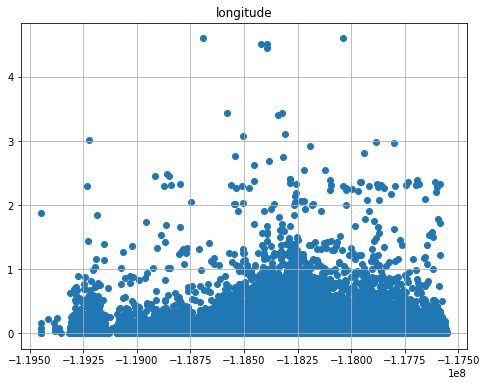

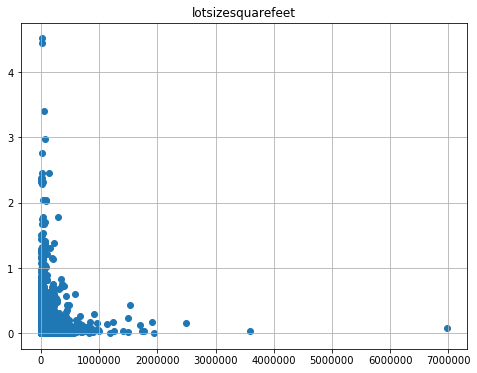

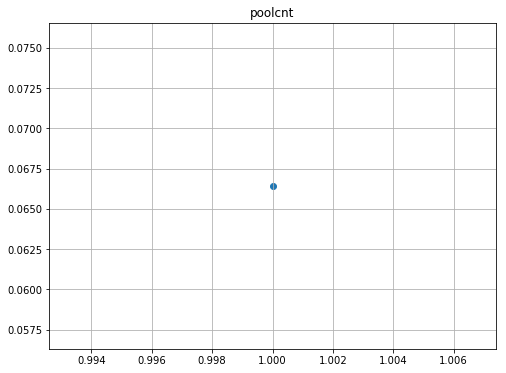

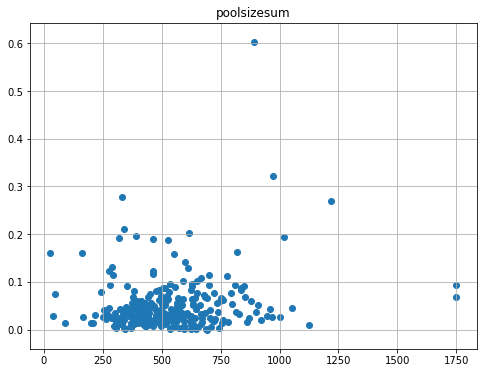

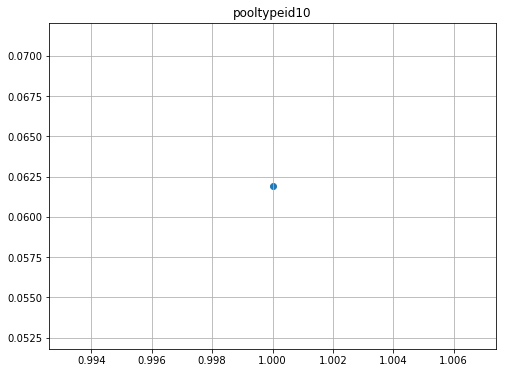

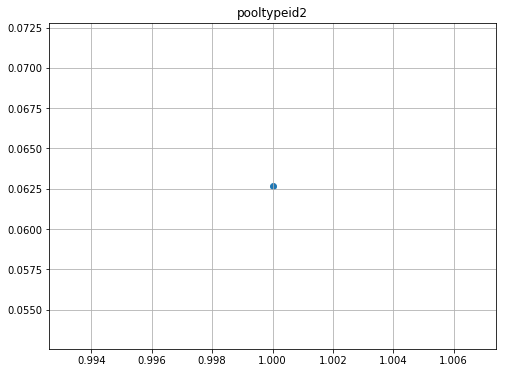

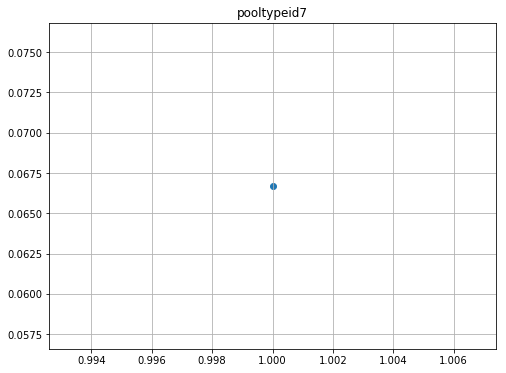

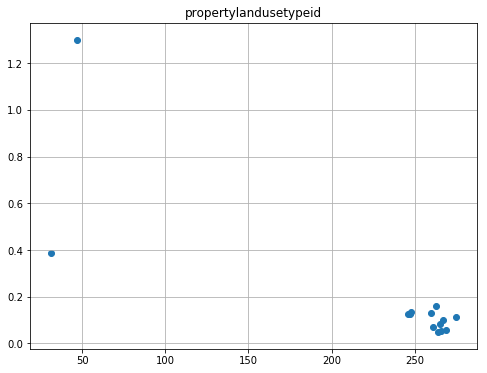

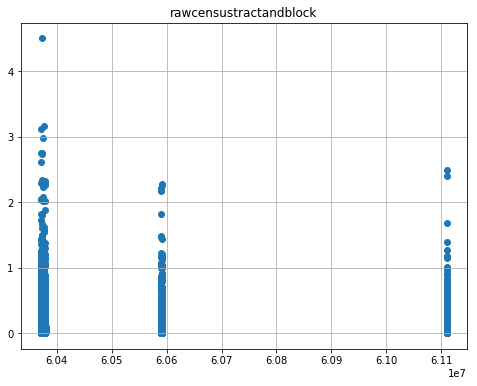

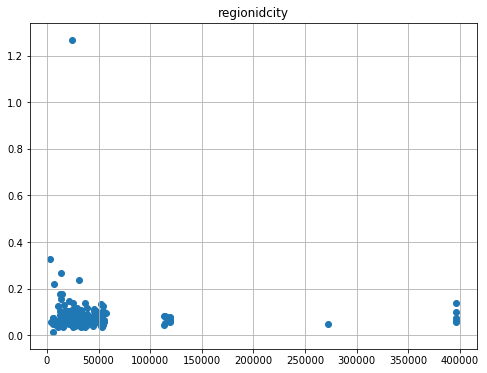

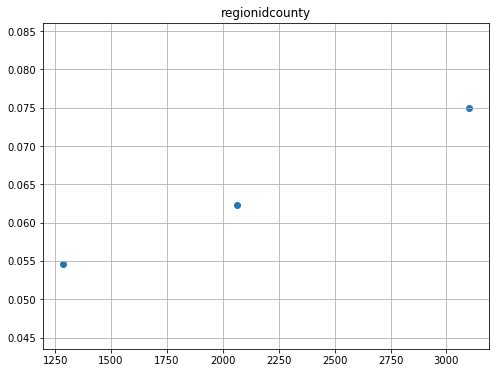

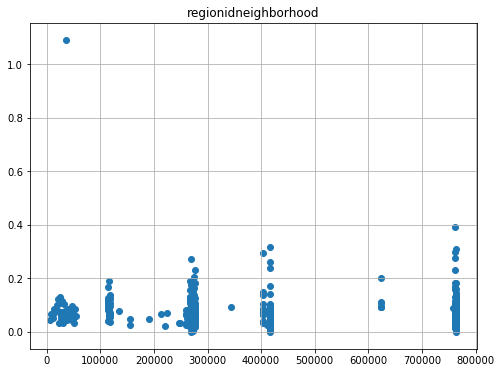

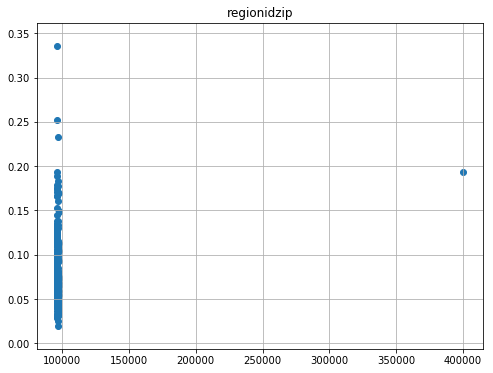

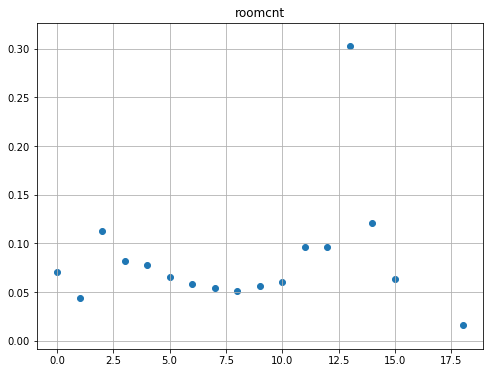

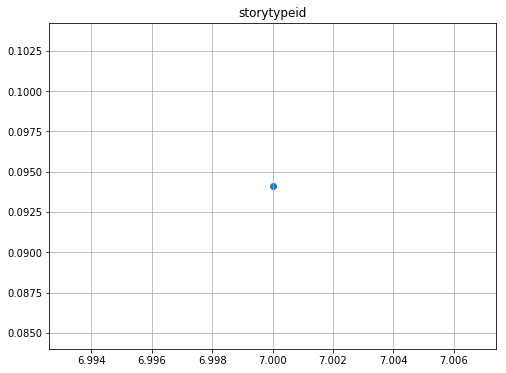

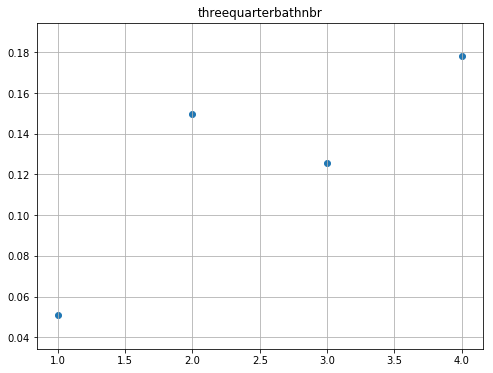

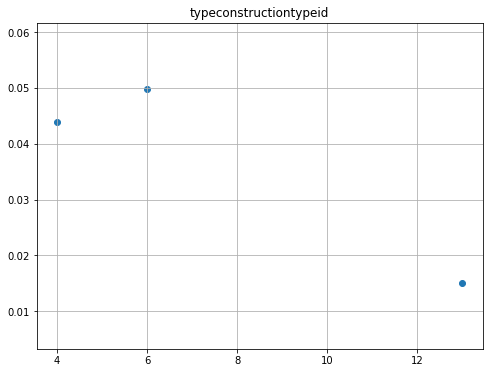

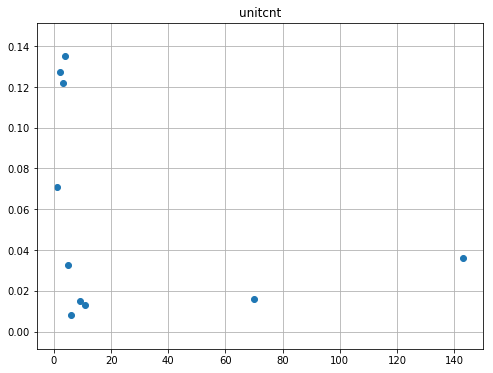

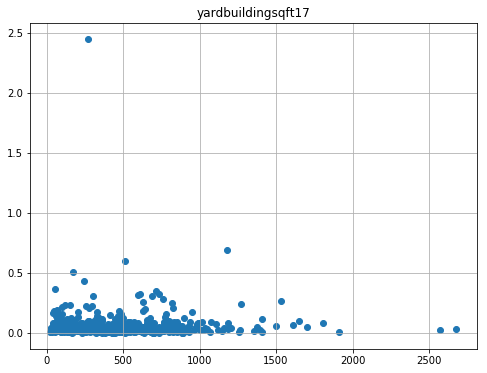

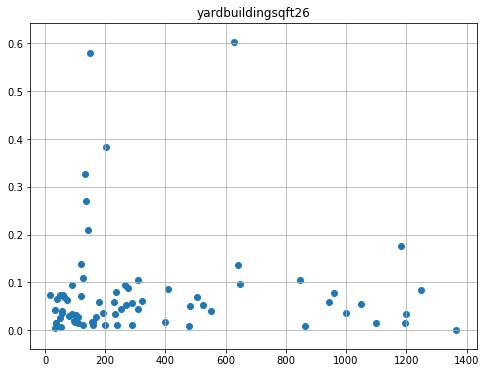

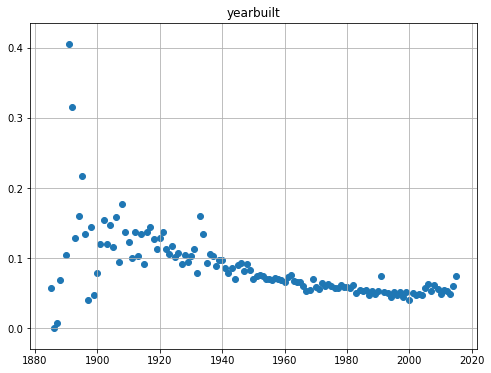

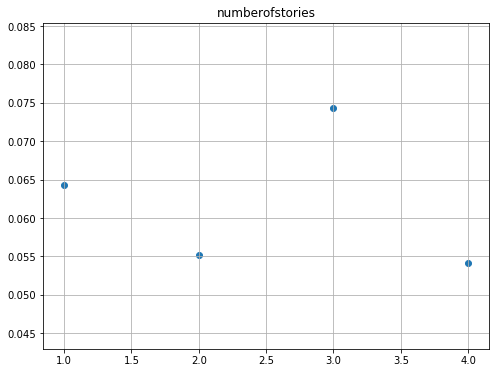

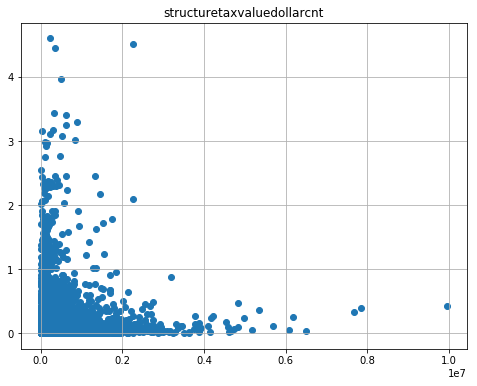

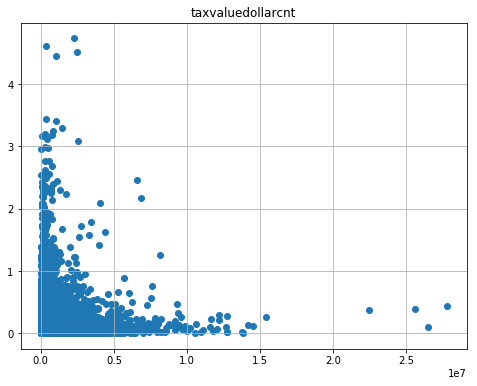

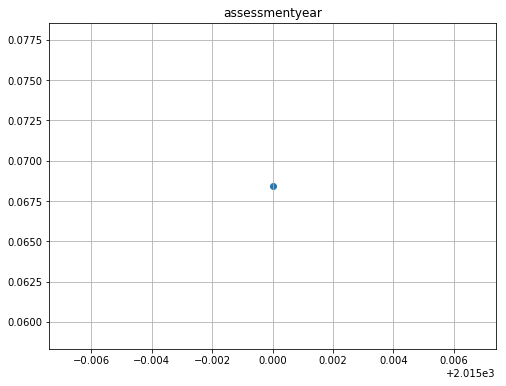

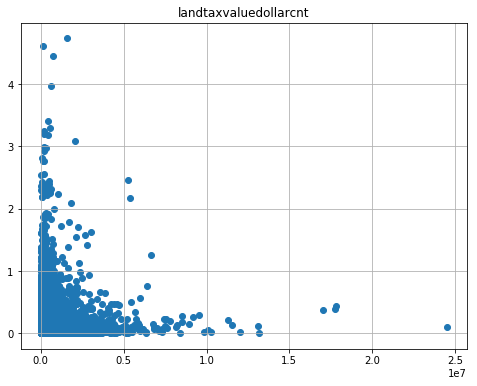

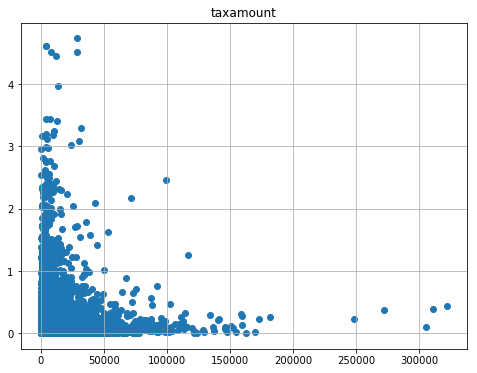

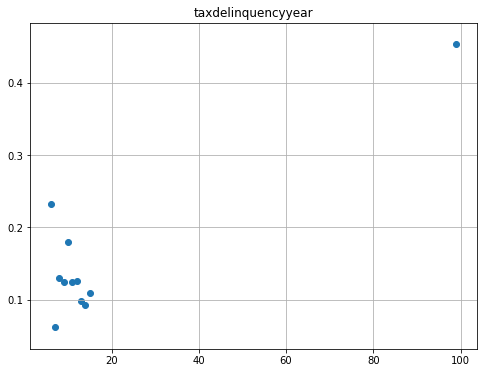

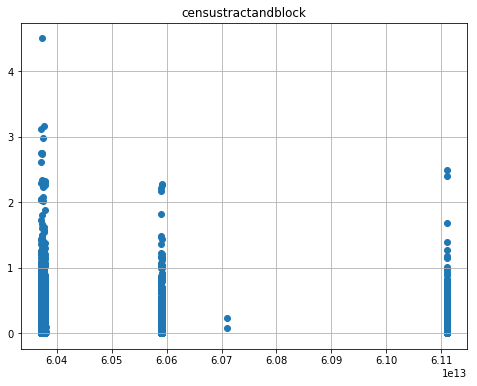

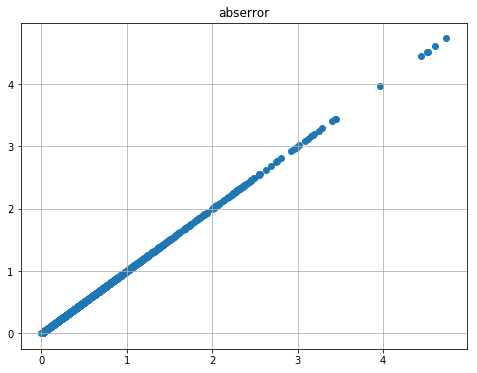

In [6]:
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_feature_abserror(col)

In [23]:
df['calculatedfinishedsquarefeet'].describe()

count    89614.000000
mean      1773.185987
std        928.162393
min          2.000000
25%       1184.000000
50%       1540.000000
75%       2095.000000
max      22741.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [ ]:
plot_feature_logerror('bathroomcnt')

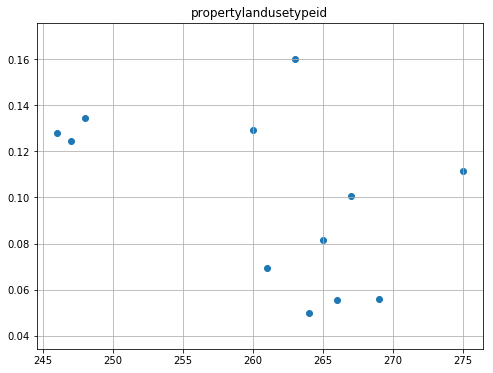

In [14]:
column = 'propertylandusetypeid'
df_test = df[df[column] > 200]
plot_log_error = df_test.groupby(column)['abserror'].mean()
plt.figure(figsize=(8, 6))
plt.title(column)
plt.grid()
plt.scatter(plot_log_error.index, plot_log_error)

In [2]:
train, prop = utils.load_train_data('../data/')

/home/hzn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
import main_script

In [8]:
config = utils.load_config('../config/steps.json')

In [7]:
prop_copy = prop.copy()

In [12]:
prop['regionidzip'].head()

0    96337.0
1    96337.0
2    96095.0
3    96424.0
4    96450.0
Name: regionidzip, dtype: float64

In [9]:
X_train, y_train, X_test, y_test, prop = main_script.process_data(train, prop, config)

Cleaning data and feature engineering...
The shape of the dataframe: (90275, 173)

Spliting data into training and testing...


In [10]:
from sklearn.ensemble import RandomForestRegressor


In [26]:
rf = RandomForestRegressor(**{
       "random_state": 42,
       "n_estimators": 300,
       "max_features": "sqrt",
       "min_samples_leaf": 1000,
       "max_depth": 10,
       "criterion": 'mae'
     })

In [ ]:
rf.fit(X_train, y_train)

In [17]:
feature_importance = list(zip(X_train.columns, rf.feature_importances_))

In [21]:
feature_importance.sort(key = lambda x: -x[1])

In [22]:
feature_importance

[('N-ValueRatio', 0.11285156438294773),
 ('taxamount', 0.087900955169710956),
 ('finishedsquarefeet12', 0.052701835276046861),
 ('calculatedfinishedsquarefeet', 0.041345197836545895),
 ('N-structuretaxvaluedollarcnt-3', 0.033749627527723987),
 ('taxvaluedollarcnt', 0.031333288560388008),
 ('N-Dev-structuretaxvaluedollarcnt', 0.029348354485958066),
 ('structuretaxvaluedollarcnt', 0.028766707317544195),
 ('N-structuretaxvaluedollarcnt-2', 0.02621622574891154),
 ('N-TotalRooms', 0.022767802008216712),
 ('landtaxvaluedollarcnt', 0.021859500264851426),
 ('yearbuilt', 0.019544948673124719),
 ('N-AvRoomSize', 0.018096855513770622),
 ('N-life', 0.018085415819126097),
 ('N-ValueProp', 0.017494552386294361),
 ('lotsizesquarefeet', 0.0157137021468127),
 ('regionidzip', 0.015453125967220087),
 ('rawcensustractandblock', 0.014791086016841837),
 ('calculatedbathnbr', 0.014310169441109155),
 ('fullbathcnt', 0.013847692949037904),
 ('lat_lon_block_value_range', 0.01347785642586493),
 ('N-LivingAreaPro

In [25]:
rf.decision_path(X_train.iloc[0])

/home/hzn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(<1x20138 sparse matrix of type '<class 'numpy.int64'>'
 	with 2869 stored elements in Compressed Sparse Row format>,
 array([    0,    75,   126,   191,   246,   303,   372,   445,   518,
          573,   646,   701,   776,   847,   920,   983,  1056,  1133,
         1198,  1253,  1318,  1383,  1454,  1519,  1586,  1647,  1730,
         1799,  1874,  1949,  2002,  2051,  2116,  2197,  2266,  2333,
         2394,  2461,  2532,  2601,  2680,  2725,  2802,  2869,  2936,
         2993,  3040,  3115,  3192,  3251,  3314,  3379,  3454,  3531,
         3600,  3665,  3734,  3777,  3836,  3911,  3974,  4037,  4106,
         4157,  4220,  4291,  4340,  4423,  4502,  4561,  4616,  4693,
         4750,  4819,  4884,  4943,  4984,  5051,  5116,  5177,  5242,
         5315,  5364,  5435,  5480,  5551,  5618,  5679,  5740,  5823,
         5886,  5953,  6018,  6087,  6158,  6229,  6294,  6369,  6424,
         6485,  6554,  6627,  6702,  6759,  6836,  6899,  6972,  7049,
         7104,  7173,  7238,  

In [17]:
zip_mean_value_dict = (prop[['regionidzip', 'taxvaluedollarcnt']]
    .groupby('regionidzip').mean()['taxvaluedollarcnt'].to_dict())

In [14]:
zip_mean_value_dict[96337]

999663.27519333735

In [18]:
prop['regionidzip'].map(zip_mean_value_dict)

In [19]:
zip_value_std_dict = (prop[['regionidzip', 'taxvaluedollarcnt']]
    .groupby('regionidzip').std()['taxvaluedollarcnt'].to_dict())

In [20]:
zip_value_std_dict

{95982.0: 126136.88013977757,
 95983.0: 148120.99619458476,
 95984.0: 132270.51531475008,
 95985.0: 691731.38844078593,
 95986.0: 907073.72872581147,
 95987.0: 488581.83356518869,
 95988.0: 2066284.3246360447,
 95989.0: 215192.43403404384,
 95991.0: 11484448.788076082,
 95992.0: 240076.7556590442,
 95993.0: 1632541.2764524566,
 95994.0: 970739.45957838476,
 95995.0: 4616745.5817238949,
 95996.0: 2980170.5663821641,
 95997.0: 175435.71406835079,
 95998.0: 7150654.0643010987,
 95999.0: 272694.91688749287,
 96000.0: 340109.56288731162,
 96001.0: 1080086.8870719087,
 96002.0: 4679256.9469218608,
 96003.0: 143387.12867258437,
 96004.0: 228298.39063687704,
 96005.0: 1862047.6397111041,
 96006.0: 643379.38474516256,
 96007.0: 335204.54045520828,
 96008.0: 698929.8349968316,
 96009.0: 3928328.2984325825,
 96010.0: 560744.72209854075,
 96012.0: 172545.11429605237,
 96013.0: 149092.99037787027,
 96014.0: 304053.77320699469,
 96015.0: 441220.37272888282,
 96016.0: 575490.11852426745,
 96017.0: 42

In [23]:
prop[prop['regionidzip'] == 95991.0]['taxvaluedollarcnt'].describe()

count    6.170000e+02
mean     1.226867e+06
std      1.148445e+07
min      1.837190e+05
25%      4.210150e+05
50%      5.950000e+05
75%      7.306700e+05
max      2.827860e+08
Name: taxvaluedollarcnt, dtype: float64

In [28]:
prop[['regionidzip', 'taxvaluedollarcnt']].groupby('regionidzip').agg(['max', 'min', 'std', 'mean'])['taxvaluedollarcnt']

,max,min,std,mean
regionidzip,,,,
95982.0,4363439.0,3934.0,1.261369e+05,1.879135e+05
95983.0,9697319.0,4095.0,1.481210e+05,1.767775e+05
95984.0,3503600.0,2396.0,1.322705e+05,2.047364e+05
95985.0,8006842.0,124.0,6.917314e+05,6.704906e+05
95986.0,17696310.0,900.0,9.070737e+05,7.027884e+05
95987.0,10319006.0,843.0,4.885818e+05,3.628961e+05
95988.0,60800396.0,2810.0,2.066284e+06,4.070393e+05
95989.0,2946422.0,4847.0,2.151924e+05,3.041952e+05
95991.0,282786000.0,183719.0,1.148445e+07,1.226867e+06


In [29]:
import sys

In [12]:
sys.getsizeof(prop)

1270968618

In [8]:
prop['regionidzip'] = prop['regionidzip'].astype('float32')

In [9]:
prop['regionidzip'].dtype

dtype('float32')

In [11]:
for col in prop.columns:
        if prop[col].dtype == 'float64':
            prop[col] = prop[col].astype('float32')

In [31]:
sys.getsizeof(train)

7492929